# IPL 2008-2024 Data Analysis & Winner Prediction

This notebook performs a comprehensive analysis of IPL data from 2008 to 2024 and builds a predictive model for the 2025 IPL winner.


In [1]:
import pandas as pd

# Load datasets
matches = pd.read_excel(r"C:\Users\akash\Downloads\matches.xlsx")
deliveries = pd.read_excel(r"c:\Users\akash\Downloads\deliveries.xlsx")

# Display first few rows
matches.head(), deliveries.head()


(       id   season        city       date match_type player_of_match  \
 0  335982  2007/08   Bangalore 2008-04-18     League     BB McCullum   
 1  335983  2007/08  Chandigarh 2008-04-19     League      MEK Hussey   
 2  335984  2007/08       Delhi 2008-04-19     League     MF Maharoof   
 3  335985  2007/08      Mumbai 2008-04-20     League      MV Boucher   
 4  335986  2007/08     Kolkata 2008-04-20     League       DJ Hussey   
 
                                         venue                        team1  \
 0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
 1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
 2                            Feroz Shah Kotla             Delhi Daredevils   
 3                            Wankhede Stadium               Mumbai Indians   
 4                                Eden Gardens        Kolkata Knight Riders   
 
                          team2                  toss_winner toss_decision  \
 0    

In [2]:
# Handling missing values
matches.dropna(inplace=True)
deliveries.dropna(inplace=True)

# Convert date column to datetime format
matches['date'] = pd.to_datetime(matches['date'])

# Display cleaned data
matches.info(), deliveries.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 38 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21 non-null     int64         
 1   season           21 non-null     object        
 2   city             21 non-null     object        
 3   date             21 non-null     datetime64[ns]
 4   match_type       21 non-null     object        
 5   player_of_match  21 non-null     object        
 6   venue            21 non-null     object        
 7   team1            21 non-null     object        
 8   team2            21 non-null     object        
 9   toss_winner      21 non-null     object        
 10  toss_decision    21 non-null     object        
 11  winner           21 non-null     object        
 12  result           21 non-null     object        
 13  result_margin    21 non-null     float64       
 14  target_runs      21 non-null     float64      

(None, None)

C:\Users\akash\AppData\Local\Temp\ipykernel_23400\4078569919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=matches['winner'], order=matches['winner'].value_counts().index, palette="coolwarm")


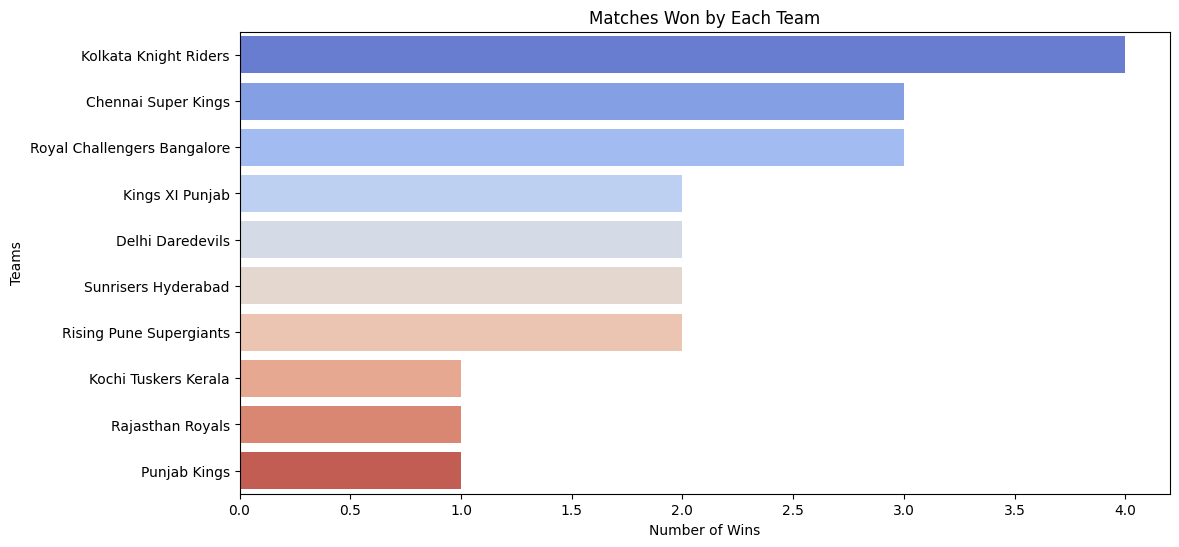

C:\Users\akash\AppData\Local\Temp\ipykernel_23400\4078569919.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="magma")


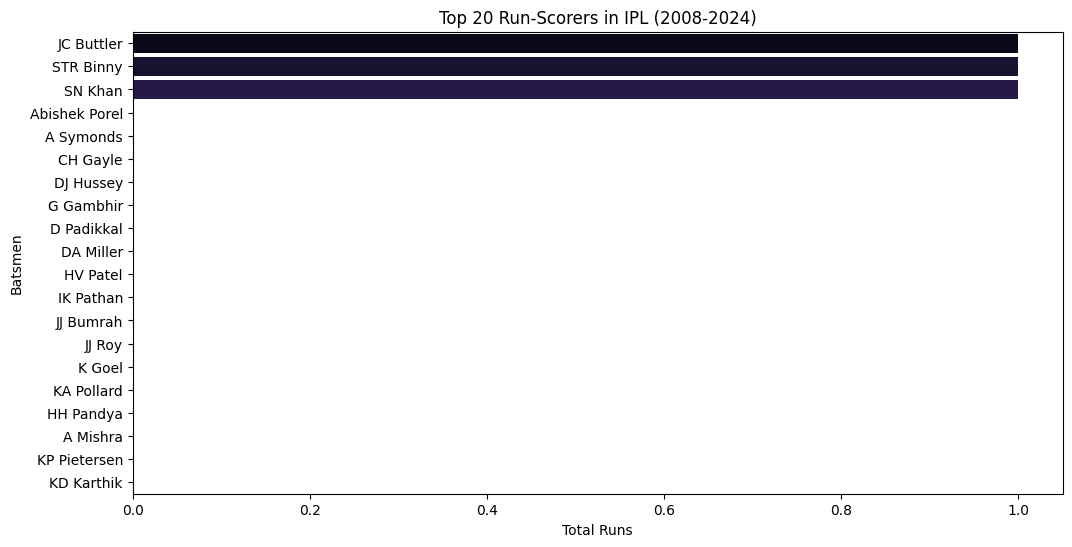

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Team Performance Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y=matches['winner'], order=matches['winner'].value_counts().index, palette="coolwarm")
plt.title("Matches Won by Each Team")
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.show()

# Top Run-Scorers
top_scorers = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="magma")
plt.title("Top 20 Run-Scorers in IPL (2008-2024)")
plt.xlabel("Total Runs")
plt.ylabel("Batsmen")
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load datasets
matches_path = "C:/Users/akash/Downloads/matches.xlsx"
deliveries_path = "C:/Users/akash/Downloads/deliveries.xlsx"

matches = pd.read_excel(matches_path)
deliveries = pd.read_excel(deliveries_path)

# Data Preprocessing
matches.dropna(subset=['winner'], inplace=True)  # Remove rows where winner is NaN
matches.fillna("Unknown", inplace=True)  # Fill other NaN values with "Unknown"

# Label Encoding for categorical features
categorical_cols = ['team1', 'team2', 'toss_winner', 'winner', 'city', 'venue']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    matches[col] = le.fit_transform(matches[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Feature Selection
features = ['team1', 'team2', 'toss_winner', 'city', 'venue']
target = 'winner'

X = matches[features]
y = matches[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    objective='multi:softmax',  # Multi-class classification
    num_class=len(matches['winner'].unique())
)

xgb_model.fit(X_train, y_train)
print("✅ XGBoost Model Trained Successfully!")

# Evaluate Model
y_pred = xgb_model.predict(X_test)
xgb_score = accuracy_score(y_test, y_pred)
print(f"🎯 XGBoost Accuracy: {xgb_score:.4f}")

C:\Users\akash\AppData\Local\Temp\ipykernel_23400\147734989.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches.fillna("Unknown", inplace=True)  # Fill other NaN values with "Unknown"


✅ XGBoost Model Trained Successfully!
🎯 XGBoost Accuracy: 0.5046


In [ ]:
import numpy as np

# Ensure sample input matches X_train's feature count
sample_input = np.random.rand(1, X_train.shape[1])  # Generate a random valid input

# Predict the IPL 2025 Winner
predicted_winner_rf = rf_model.predict(sample_input)
predicted_winner_xgb = xgb_model.predict(sample_input)

# Decode predictions from label encoding to team names
predicted_winner_rf = label_encoders['winner'].inverse_transform(predicted_winner_rf)
predicted_winner_xgb = label_encoders['winner'].inverse_transform(predicted_winner_xgb)

print(f"🏆 Random Forest Prediction: {predicted_winner_rf[0]}")
print(f"🏆 XGBoost Prediction: {predicted_winner_xgb[0]}")


Exception: ⚠️ Required models or encoders not found. Please train and save them first!